In [22]:
# in this project we perform customer segmentation on a sales dataset. the available features are: order_number, order_date, customer_number, type, month, item_number (SKU), quantity, category, revenue, customer_source, order_source

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [24]:
df= pd.read_csv('data/sales.csv')

# Display the first few rows of the DataFrame
print(df.head())

  order_number  order_date customer_number       type    month item_number  \
0       KE0001  2024-01-01         CKE0539     RETAIL  2024-01      KE0895   
1       KE0001  2024-01-01         CKE0539     RETAIL  2024-01      KE1000   
2       KE0001  2024-01-01         CKE0539     RETAIL  2024-01      KE0921   
3       KE0002  2024-01-01         CKE0580  WHOLESALE  2024-01      KE0015   
4       KE0002  2024-01-01         CKE0580  WHOLESALE  2024-01      KE0224   

   quantity       category    revenue customer_source order_source  
0        12       DIABETES   5.098618          direct          App  
1        23  HYPERTENSIVES  12.460205          direct          App  
2        12  HYPERTENSIVES   8.012194          direct          App  
3        23       DIABETES  13.854194           agent         call  
4        21  HYPERTENSIVES  10.534678           agent         call  


In [25]:
# check for missing values
print(df.isnull().sum())

order_number       0
order_date         0
customer_number    0
type               0
month              0
item_number        0
quantity           0
category           0
revenue            0
customer_source    0
order_source       0
dtype: int64


In [26]:
# check the data types of the columns
print(df.dtypes)

order_number        object
order_date          object
customer_number     object
type                object
month               object
item_number         object
quantity             int64
category            object
revenue            float64
customer_source     object
order_source        object
dtype: object


In [27]:
# convert the order_date and month columns to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = pd.to_datetime(df['month'])
df.dtypes

order_number               object
order_date         datetime64[ns]
customer_number            object
type                       object
month              datetime64[ns]
item_number                object
quantity                    int64
category                   object
revenue                   float64
customer_source            object
order_source               object
dtype: object

In [28]:
# unique values in each column
print(df.nunique())

order_number       20600
order_date           206
customer_number     1000
type                   2
month                  7
item_number         1000
quantity              36
category               2
revenue            61800
customer_source        2
order_source           5
dtype: int64


/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_30277/484160246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_abbr', y='revenue', data=monthly_revenue, palette='viridis')


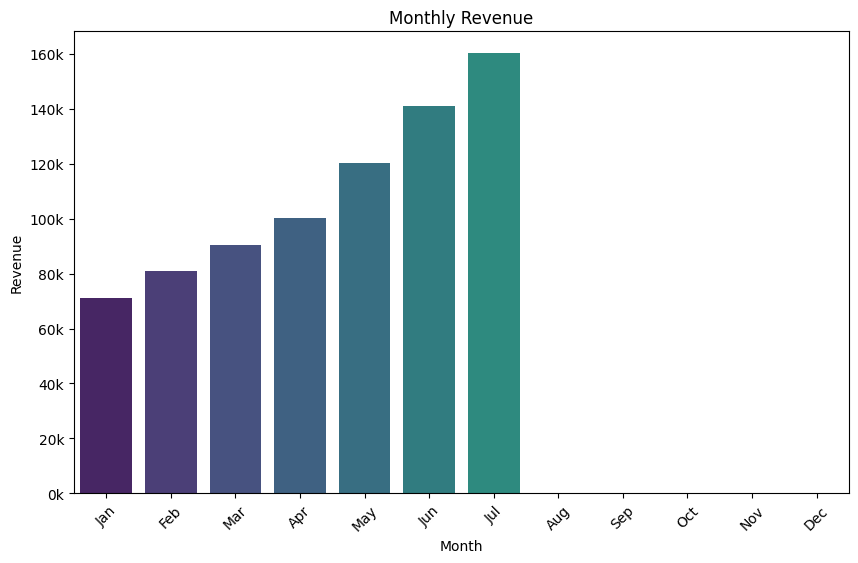

In [29]:

df['month'] = df['order_date'].dt.month
month_abbr = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['month_abbr'] = df['month'].map(month_abbr)

# Aggregate monthly revenue
monthly_revenue = df.groupby('month_abbr')['revenue'].sum().reset_index()

# Define a categorical type for the month_abbr to ensure proper sorting
monthly_revenue['month_abbr'] = pd.Categorical(monthly_revenue['month_abbr'], 
                                               categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                                               ordered=True)

# Sort by the 'month_abbr' column
monthly_revenue = monthly_revenue.sort_values(by='month_abbr')

# Plot monthly revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='month_abbr', y='revenue', data=monthly_revenue, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')

# Format y-label as shortened form
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

plt.xticks(rotation=45)
plt.show()

In [30]:
df.dtypes

order_number               object
order_date         datetime64[ns]
customer_number            object
type                       object
month                       int32
item_number                object
quantity                    int64
category                   object
revenue                   float64
customer_source            object
order_source               object
month_abbr                 object
dtype: object

In [31]:
# Top 10 performing products by revenue
top_10_products = df.groupby('item_number')['revenue'].sum().nlargest(10).reset_index()

# Average revenue by category
avg_revenue_category = df.groupby('category')['revenue'].mean().reset_index()

# Average revenue by type
avg_revenue_type = df.groupby('type')['revenue'].mean().reset_index()

# Average revenue by customer source
avg_revenue_customer_source = df.groupby('customer_source')['revenue'].mean().reset_index()

# Average revenue by order source
avg_revenue_order_source = df.groupby('order_source')['revenue'].mean().reset_index()

/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_30277/829695495.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='item_number', y='revenue', data=top_10_products, palette='viridis')


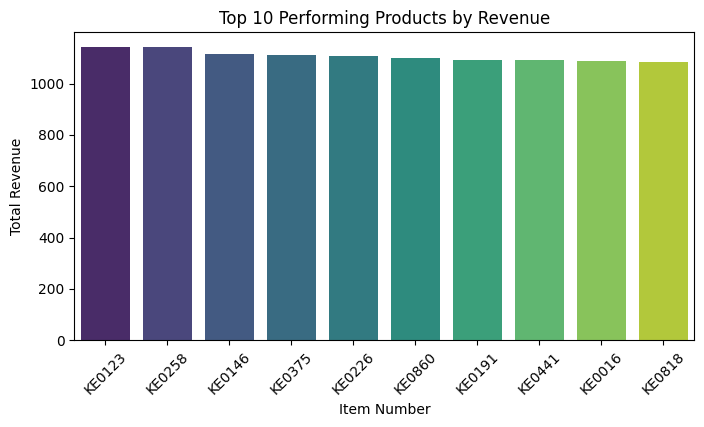

In [32]:
# Visualizing the metrics

# Bar chart for Top 10 performing products
plt.figure(figsize=(8, 4))
sns.barplot(x='item_number', y='revenue', data=top_10_products, palette='viridis')
plt.title('Top 10 Performing Products by Revenue')
plt.xlabel('Item Number')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

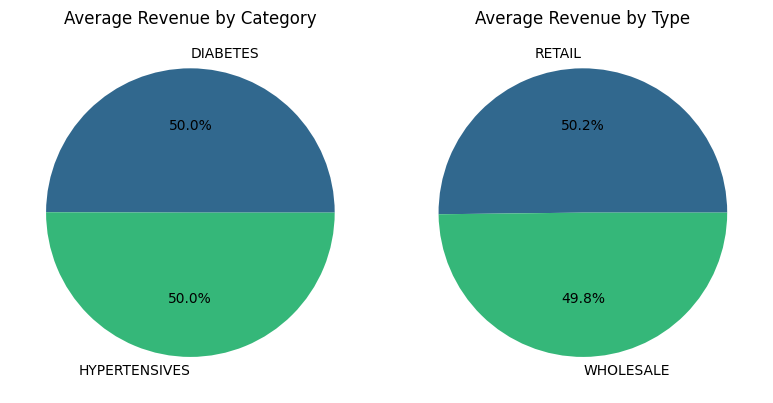

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart for Average Revenue by Category
axes[0].pie(avg_revenue_category['revenue'], labels=avg_revenue_category['category'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 2))
axes[0].set_title('Average Revenue by Category')

# Pie chart for Average Revenue by Type
axes[1].pie(avg_revenue_type['revenue'], labels=avg_revenue_type['type'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 2))
axes[1].set_title('Average Revenue by Type')

plt.tight_layout()
plt.show()


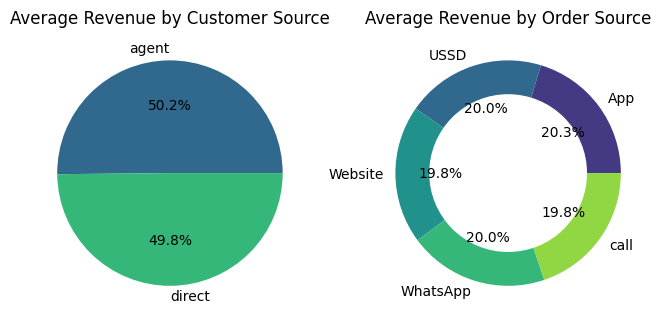

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart for Average Revenue by Customer Source
axes[0].pie(avg_revenue_customer_source['revenue'], labels=avg_revenue_customer_source['customer_source'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 2))
axes[0].set_title('Average Revenue by Customer Source')

# Donut chart for Average Revenue by Order Source
axes[1].pie(avg_revenue_order_source['revenue'], labels=avg_revenue_order_source['order_source'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 5))
axes[1].set_title('Average Revenue by Order Source')
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


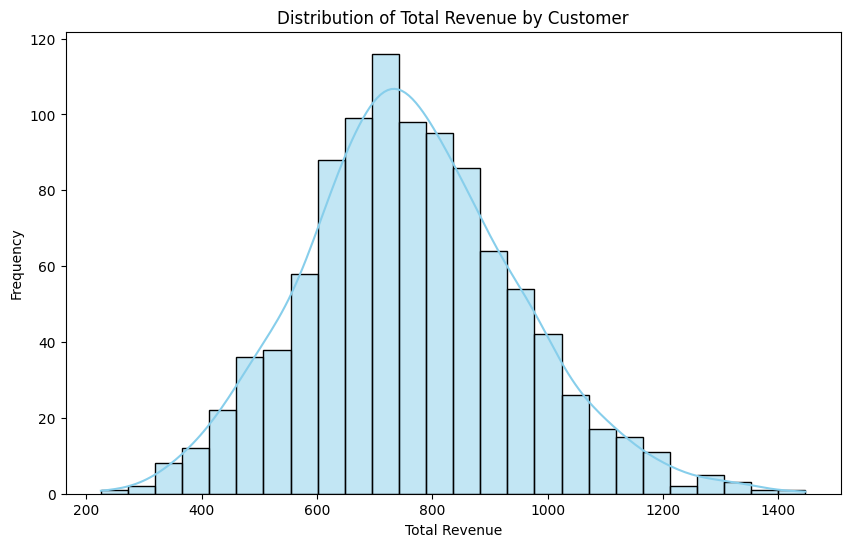

/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_30277/3970553464.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='customer_number', data=top_n_customers, palette='viridis')


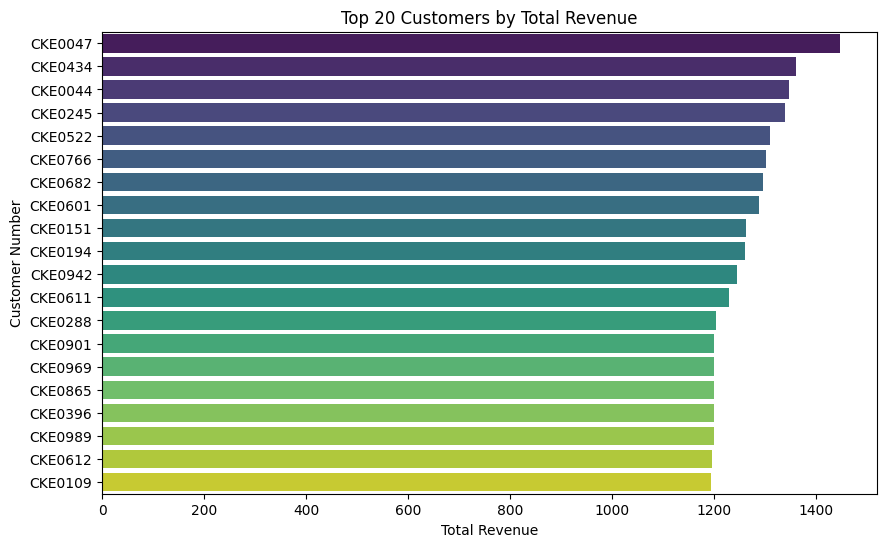

In [45]:
# Calculate total revenue for each customer
total_revenue = df.groupby('customer_number')['revenue'].sum().reset_index()
total_revenue.columns = ['customer_number', 'total_revenue']

# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(total_revenue['total_revenue'], kde=True, color='skyblue')
plt.title('Distribution of Total Revenue by Customer')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

# Top N Bar Chart (Top 20 Customers)
top_n_customers = total_revenue.nlargest(20, 'total_revenue')
plt.figure(figsize=(10, 6))
sns.barplot(x='total_revenue', y='customer_number', data=top_n_customers, palette='viridis')
plt.title('Top 20 Customers by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Customer Number')
plt.show()

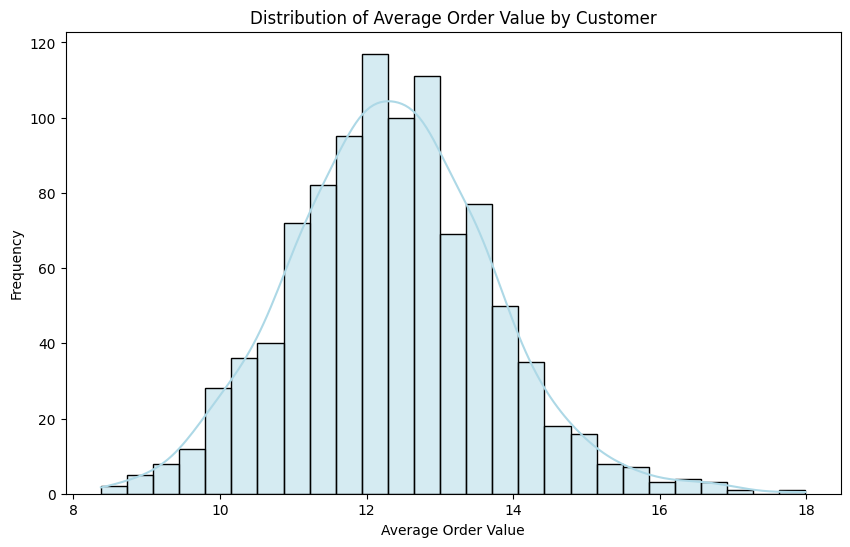

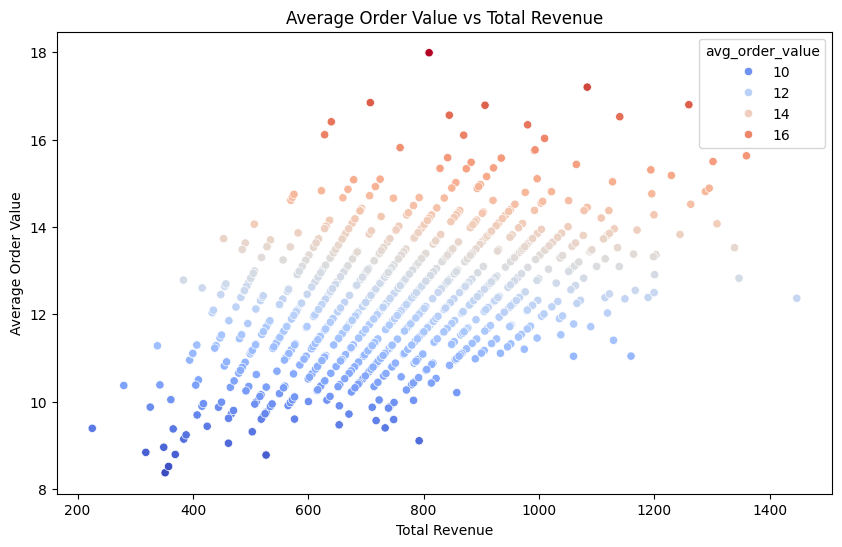

In [47]:
# Calculate average order value for each customer
avg_order_value = df.groupby('customer_number')['revenue'].mean().reset_index()
avg_order_value.columns = ['customer_number', 'avg_order_value']

# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(avg_order_value['avg_order_value'], kde=True, color='lightblue')
plt.title('Distribution of Average Order Value by Customer')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot (Average Order Value vs Total Revenue)
merged_data = pd.merge(total_revenue, avg_order_value, on='customer_number')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_revenue', y='avg_order_value', data=merged_data, hue='avg_order_value', palette='coolwarm')
plt.title('Average Order Value vs Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Average Order Value')
plt.show()

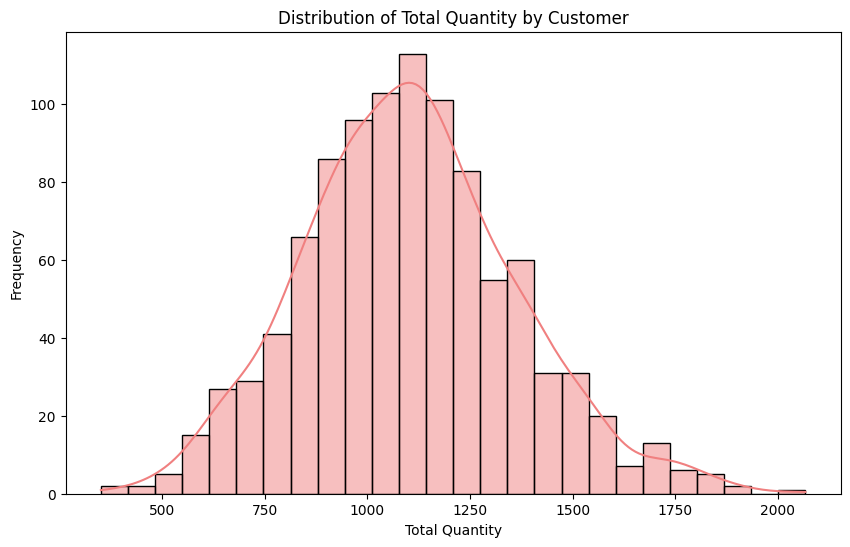

In [52]:
# Calculate total quantity for each customer
total_quantity = df.groupby('customer_number')['quantity'].sum().reset_index()
total_quantity.columns = ['customer_number', 'total_quantity']

# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(total_quantity['total_quantity'], kde=True, color='lightcoral')
plt.title('Distribution of Total Quantity by Customer')
plt.xlabel('Total Quantity')
plt.ylabel('Frequency')
plt.show()


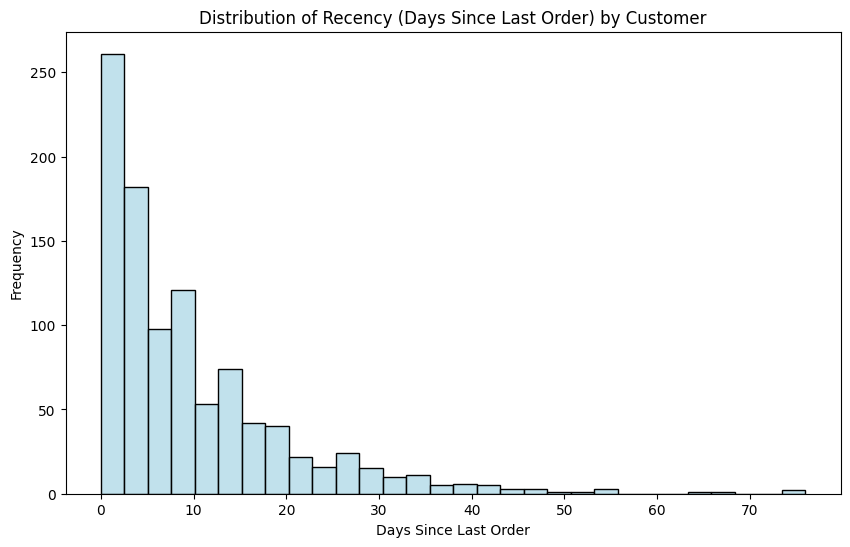

/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_30277/2461823266.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(recency.pivot_table(index='revenue_segment', columns='recency', aggfunc='size', fill_value=0), cmap='Blues')


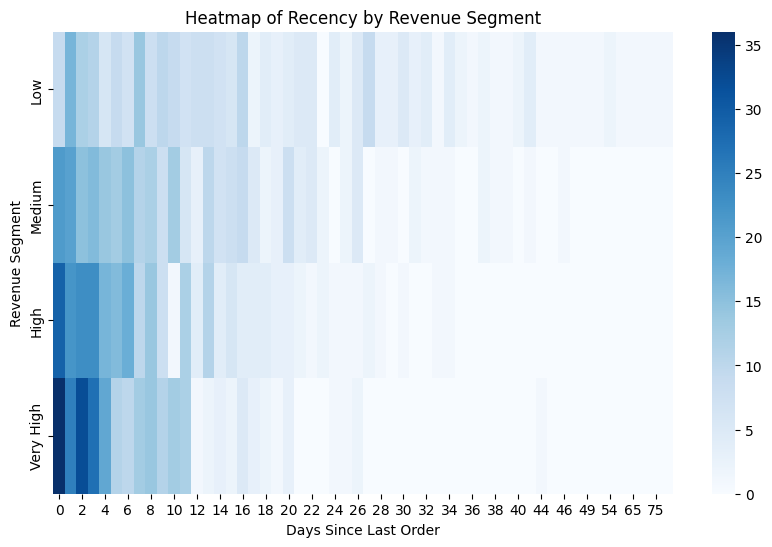

In [50]:
# Calculate recency for each customer
recency = df.groupby('customer_number')['order_date'].max().reset_index()
recency['recency'] = (df['order_date'].max() - recency['order_date']).dt.days
recency = recency.drop('order_date', axis=1)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(recency['recency'], bins=30, color='lightblue')
plt.title('Distribution of Recency (Days Since Last Order) by Customer')
plt.xlabel('Days Since Last Order')
plt.ylabel('Frequency')
plt.show()

# Heatmap of Recency by Revenue Segment
recency = pd.merge(recency, total_revenue, on='customer_number')
recency['revenue_segment'] = pd.qcut(recency['total_revenue'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10, 6))
sns.heatmap(recency.pivot_table(index='revenue_segment', columns='recency', aggfunc='size', fill_value=0), cmap='Blues')
plt.title('Heatmap of Recency by Revenue Segment')
plt.xlabel('Days Since Last Order')
plt.ylabel('Revenue Segment')
plt.show()


In [55]:
# Merge all features into a single DataFrame
customer_data = total_revenue.merge(avg_order_value, on='customer_number')
customer_data = customer_data.merge(total_quantity, on='customer_number')
customer_data = customer_data.merge(recency, on='customer_number')

# Display the aggregated data
print(customer_data.shape)
print(customer_data.head())


(1000, 7)
  customer_number  total_revenue_x  avg_order_value  total_quantity  recency  \
0         CKE0001       898.259321        14.970989            1239        1   
1         CKE0002       971.449778        14.078982            1310        1   
2         CKE0003       919.518332        12.771088            1329        9   
3         CKE0004      1119.219980        13.817531            1546        5   
4         CKE0005       755.622781        12.593713            1049       17   

   total_revenue_y revenue_segment  
0       898.259321       Very High  
1       971.449778       Very High  
2       919.518332       Very High  
3      1119.219980       Very High  
4       755.622781            High  
